# Chapter 1 Overview of Deep Learning Using PyTorch

* Deep learning uses large amount of data to learn non-trivial relationships between inputs and outputs

* The books states it covers PyTorch and some of the newer models

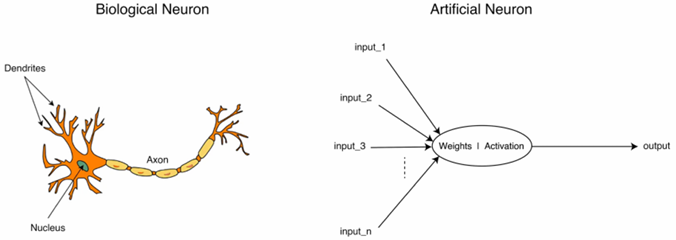

Each computational unit is a neuron, when you have more than two layers it forms and Neural Network and is considered a `Deep Neural Network DNN`

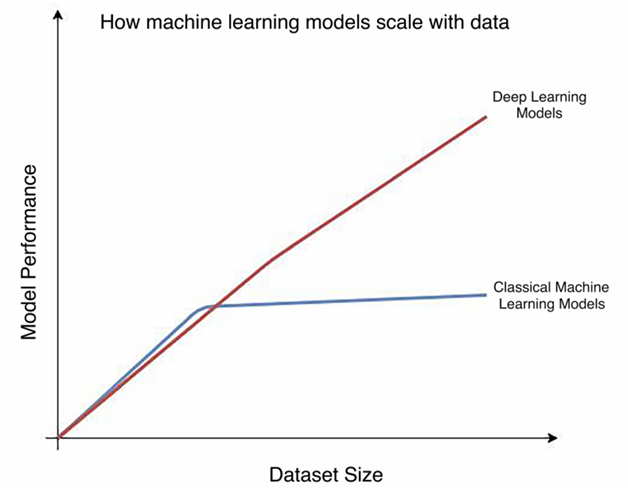

* Fully-connected / Linear
  * All neurons preceding this layer are connected to all neurons succeeding this layer
* Convolutional CNN
  * Most effective for computer vision
  * A kernel/filter is convolved over the input
  * WTF does convolved mean
    * Its a sliding window operation over the input layer
    * Similar to a sliding block game
* Recurrent
  * Similar to Fully-connected
  * Recurrent has the ability to remember past inputs along with present inputs
  * Good for sequential data
* DeConvolutional
  * Reverse of a CNN
  * Expands the input data spatially
  * Good for image reconstruction
* Pooling (Max Pool Layer)
  * Max or Min Pooling
  * takes the highest or lowest number from a set
  * 8x8 grid chunked into 4 2x2 and the max number used from each 2x2 block used to make the output

# Activation Functions

These add non-linearity, without this the NN would always just be a linear model.

* Sigmoid
  * logistic function
  * Outputs a value in the 0,1 range
* TanH
  * similar to sigmoid
  * Outputs a value in the -1,1 range
  * good when you need - and + outputs
* Rectified Linear Units ReLUs
  * Prevents gradient from diminishing to 0
  * Useful for dealing with curves in data
* Leaky ReLU
  * Similar to ReLU but allows to process negative input


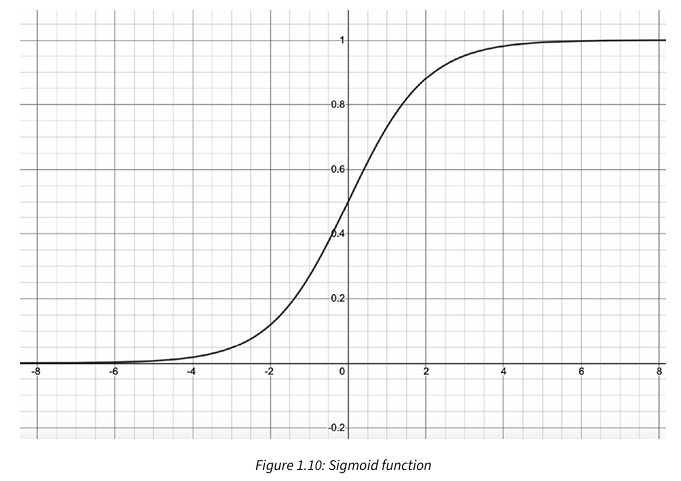

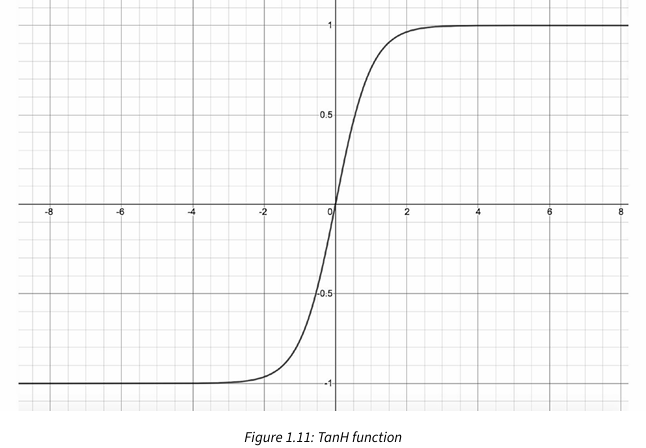

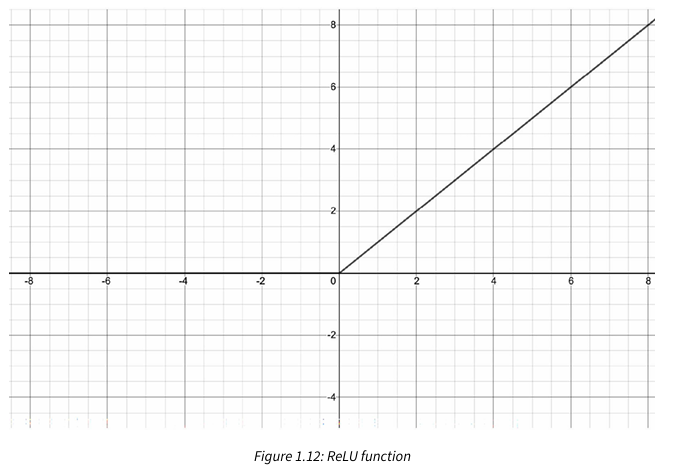

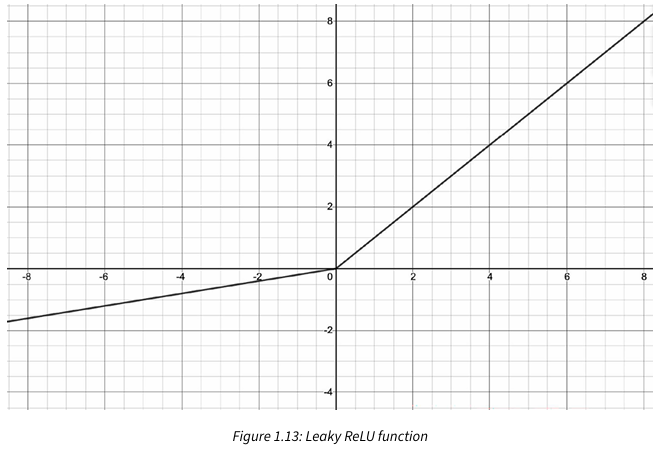

# Optimization Schedule

Training occurs when the model tunes its parameters. The parameters are tuned through backpropagation.

The final or output layer yields a loss, a loss function calculates this loss. This loss is then backpropagated to the previous layers using a gradient descent and the chain rule of differentiation.

A Learning rate between 0 and 1 is applied and paramters/weights are adjusted. This entire procedure is called the optimization schedule.

* Stochastic Gradient Descent (SGD)
  * single learning rate
* Adagrad
  * per parameter updates
  * still between 0 and 1
* Adadelta
  * Computes the sum of squared gradients
* RMSprop
  * Similar to Adadelta but does not adjust for dimensionality problem
* Adaptive Moment Estimation (Adam)
  * Calculates custom learning rates for each parameter
  * Good for complex deep learning models

Sparse data: Use <span style="color:red">**ada**</span>ptive optimizers



# PyTorch Generalities In Relation To Tensorflow

Tensors: computational units

### Tensor Modules

* Tensors are similar to numpy arrays
* Tensors are n-dimensional arrays

Instantiate a tensor: `points = torch.tensor([1.0, 4.0, 2.0, 1.0, 3.0, 5.0])`

Get first entry in tensor: `points[0]`

Check the tensor shape: `points.shape`

Pytorch tensors have storage attributes.

`points = torch.tensor([[1.0, 4.0], [2.0, 1.0], [3.0, 5.0]])`

`points.storage()`

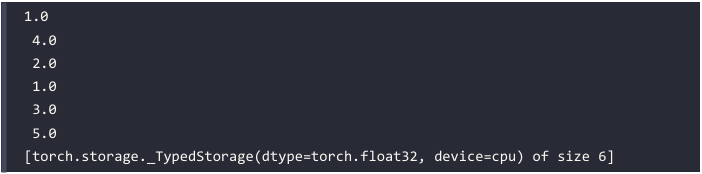

Check the size of tensor dimensions: `points.size()`

* PyTorch Tensor datatypes
  * Can be 16, 32, 64 bit floats
  * Can be 8, 16, 32, 64 bit signed integers
  * Can be 8 bit unsigned integer

Specify datatype: `points = torch.tensor([[1.0, 2.0], [3.0, 4.0]], dtpye=torch.float32)`

Also specify where they will be stored (GPU): `points = torch.tensor([[1.0, 2.0], [3.0, 4.0]], dtpye=torch.float32, device='cpu')` or `...,device='cuda')`

You can also use `to` to send to a device: `points_3 = points.to(device='cuda:0')`

# PyTorch Modules

Page 21

## `torch.nn`

This is the neural network which is layers and neurons.

`torch.nn.functiona` is a submodule that has all the functions of `torch.nn`, this contains loss functions, activating functions, and neural functions.

## `torch.optim`

Through backpropagation we tune weights/parameters of the network, this is optimization. `optim` contains all the tools to run the various optimizers. This allows us to write `opt = optim.SGD(mode.parameters(), lr=lr)` instead of the full function/steps/loop.

## `torch.utils.data`

* Provides
  * dataset
    * Holds all your data, keeps track of data
  * DataLoader
    * Helps load data one by one
    * Allows for batching
    * Data delivery

Setup the following:

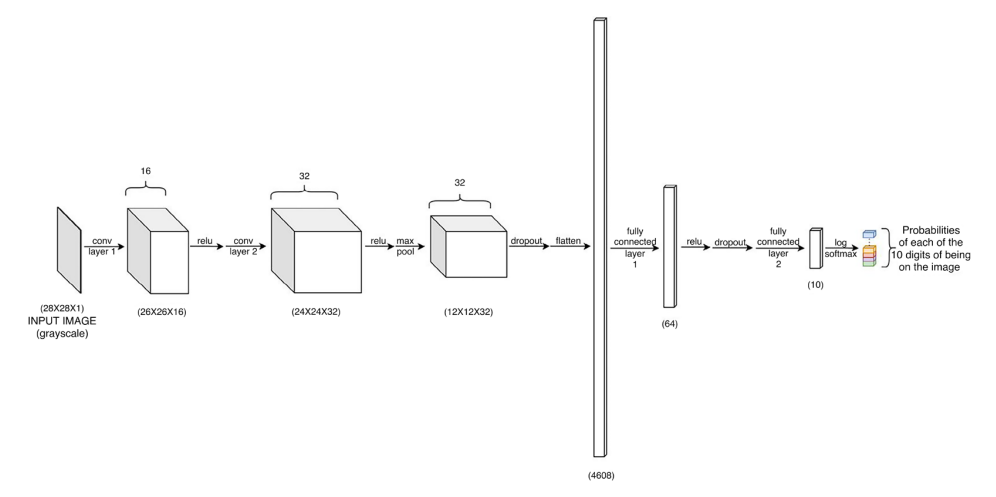

# Training a neural network using PyTorch

Download MNIST dataset, classify the images

In [ ]:
# Imports and set training to utilize cuda

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
import matplotlib.pyplot as plt

# This may not be needed for this books examples but I randomly swap GPUs so this helps
# Set the device type and device ID
device_type = "xpu" if torch.xpu.is_available() else "cuda" if torch.cuda.is_available() else "cpu"
device_id = 1  # Change this to the desired device index, e.g., 0 or 1
# Combine device type and device ID to create the device variable
device = torch.device(f"{device_type}:{device_id}" if device_type else "cpu")
print(f"Using device: {device}")


### Configure the model class

In [25]:
class ConvNet(nn.Module): # This will subclass the nn.Module class
    def __init__(self):
        super(ConvNet, self).__init__()
        self.cn1 = nn.Conv2d(1, 16, 3, 1) # 1 input channel, 16 output channels, 3x3 kernel, stride 1
        self.cn2 = nn.Conv2d(16, 32, 3, 1)
        self.dp1 = nn.Dropout2d(0.10)
        self.dp2 = nn.Dropout2d(0.25)
        self.fc1 = nn.Linear(4608, 64) # 4608 input features, 64 output features
        self.fc2 = nn.Linear(64, 10) # 64 input features, 10 output features
    def forward(self, x):
        x = self.cn1(x)
        x = F.relu(x)
        x = self.cn2(x) # Convolutional layer
        x = F.relu(x) # ReLU activation function which changes all negative values to 0
        x = F.max_pool2d(x, 2) # Max pooling layer which halves the size of the input
        x = self.dp1(x) # Dropout layer
        x = torch.flatten(x, 1) # Flatten all dimensions except batch
        x = self.fc1(x)
        x = F.relu(x)
        x = self.dp2(x)
        x = self.fc2(x)
        op = F.log_softmax(x, dim=1) # Output layer, softmax activation function which outputs a probability distribution
        return op


### We can also create a simpler Sequential model

This is a more compact way to create the model

In [26]:
model = nn.Sequential(
    nn.Conv2d(1, 16, 3, 1),
    nn.ReLU(),
    nn.Conv2d(16, 32, 3, 1),
    nn.ReLU(),
    nn.MaxPool2d(2),
    nn.Dropout2d(0.10),
    nn.Flatten(),
    nn.Linear(4608, 64),
    nn.ReLU(),
    nn.Dropout(0.25),
    nn.Linear(64, 10),
    nn.LogSoftmax(dim=1)
)

Use `nn.Module` when you want more control, or creating more complex models.

Use `nn.Sequential` when you need simple concise code and/or dont need to worry about implementation details.

### Define the training routine

This is where backpropagation occurs etc...

In [27]:
def train(model, device, train_dataloader, optim, epoch):
    model.train()
    for b_i, (X, y) in enumerate(train_dataloader):
        X, y = X.to(device), y.to(device)
        optim.zero_grad()
        pred_prob = model(X)
        loss = F.nll_loss(pred_prob, y)
        # nll is negative likelihood loss
        loss.backward()
        optim.step()
        if b_i % 10 == 0: 
            print('epoch: {} [{}/{} ({:.0f}%)]\t Training loss: {:.6f}'.format(
                epoch, b_i * len(X),
                len(train_dataloader.dataset),
                100. * b_i / len(train_dataloader),
                loss.item()))

### Define the testing routine

Computer loss and ground truth is not used to tune the model weights etc...

In [28]:
def test(model, device, test_dataloader):
    model.eval() # Set the model to evaluation mode
    loss = 0
    success = 0
    with torch.no_grad():
        for X, y in test_dataloader:
            X, y = X.to(device), y.to(device)
            pred_prob = model(X)
            loss += F.nll_loss(pred_prob, y, reduction='sum').item()
            pred = pred_prob.argmax(dim=1, keepdim=True)
            success += pred.eq(y.view_as(pred)).sum().item()
    loss /= len(test_dataloader.dataset)
    print('\nTest dataset: Overall Loss: {:.4f}, Overall Accuracy: {}/{} ({:.0f}%)\n'.format(loss, success, len(test_dataloader.dataset), 100. * success / len(test_dataloader.dataset)))

### Using the dataloader to load train and test datasets

In [ ]:
train_dataloader = torch.utils.data.DataLoader(
    datasets.MNIST('../data', train=True, download=True,
                   transform=transforms.Compose([
                       transforms.ToTensor(),
                       transforms.Normalize((0.1302,), (0.3069,))])),
                    batch_size=32, shuffle=True) # Do shuffle the training dataset
test_dataloader = torch.utils.data.DataLoader(
    datasets.MNIST('../data', train=False,
                   transform=transforms.Compose([
                       transforms.ToTensor(),
                       transforms.Normalize((0.1302,), (0.3069,))])),
                    batch_size=32, shuffle=False) # Dont shuffle the test dataset

### Setup optimizer and device

In [30]:
torch.manual_seed(0)
torch.cuda.manual_seed(0)
# We already set the device to xpu or cuda in the beginning
# device = torch.device("cpu")
model = ConvNet().to(device)
optimizer = optim.Adadelta(model.parameters(), lr=0.5)

### Train the model

In [ ]:
for epoch in range(1, 3):
    train(model, device, train_dataloader, optimizer, epoch)
    test(model, device, test_dataloader)

print(f"Data was processed on: {device}")

### Manually validate the trained data

This should show the number `7`

In [ ]:
test_samples = enumerate(test_dataloader)
b_i, (sample_data, sample_targets) = next(test_samples)
plt.imshow(sample_data[0][0], cmap='gray', interpolation='none')

### Compare against ground truth

Ground Truth = the expected result the model should aim to predict during training.

Note: We are using `cuda` so we must move our data to the gpu before checking the sample data against the model.

In [ ]:
sample_data = sample_data.to(device)
sample_targets = sample_targets.to(device)

print(f"Model prediction is: {model(sample_data).data.max(1)[1][0]}")
print(f"Ground truth is: {sample_targets[0]}")

# Chapter 1 Wrap Up Code

* Order of operations
  * Imports
  * Set device
  * Create model class or sequential model
  * Create train and test functions
  * Injest data with DataLoader
  * Seed, Model, Optimizer
  * Train and Test
  * Validate data and test Ground Truth

Using device: cuda:1
epoch: 1 [0/60000 (0%)]	 Training loss: 2.302056
epoch: 1 [320/60000 (1%)]	 Training loss: 1.851984
epoch: 1 [640/60000 (1%)]	 Training loss: 1.082738
epoch: 1 [960/60000 (2%)]	 Training loss: 0.890768
epoch: 1 [1280/60000 (2%)]	 Training loss: 0.724733
epoch: 1 [1600/60000 (3%)]	 Training loss: 0.424602
epoch: 1 [1920/60000 (3%)]	 Training loss: 0.451785
epoch: 1 [2240/60000 (4%)]	 Training loss: 0.659871
epoch: 1 [2560/60000 (4%)]	 Training loss: 0.396592
epoch: 1 [2880/60000 (5%)]	 Training loss: 0.318422
epoch: 1 [3200/60000 (5%)]	 Training loss: 0.546717
epoch: 1 [3520/60000 (6%)]	 Training loss: 0.289207
epoch: 1 [3840/60000 (6%)]	 Training loss: 0.441279
epoch: 1 [4160/60000 (7%)]	 Training loss: 0.349335
epoch: 1 [4480/60000 (7%)]	 Training loss: 0.298149
epoch: 1 [4800/60000 (8%)]	 Training loss: 0.572963
epoch: 1 [5120/60000 (9%)]	 Training loss: 0.384586
epoch: 1 [5440/60000 (9%)]	 Training loss: 0.481135
epoch: 1 [5760/60000 (10%)]	 Training loss: 0.150

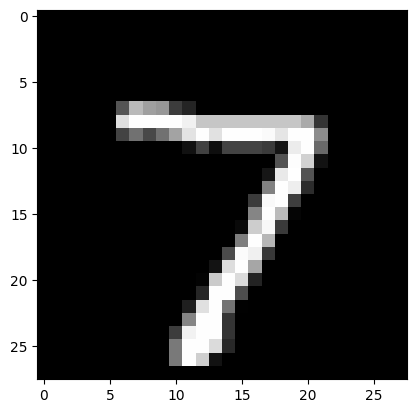

In [35]:
# Imports and set training to utilize cuda

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
import matplotlib.pyplot as plt

# This may not be needed for this books examples but I randomly swap GPUs so this helps
# Set the device type and device ID
device_type = "xpu" if torch.xpu.is_available() else "cuda" if torch.cuda.is_available() else "cpu"
device_id = 1  # Change this to the desired device index, e.g., 0 or 1
# Combine device type and device ID to create the device variable
device = torch.device(f"{device_type}:{device_id}" if device_type else "cpu")
print(f"Using device: {device}")

class ConvNet(nn.Module): # This will subclass the nn.Module class
    def __init__(self):
        super(ConvNet, self).__init__()
        self.cn1 = nn.Conv2d(1, 16, 3, 1) # 1 input channel, 16 output channels, 3x3 kernel, stride 1
        self.cn2 = nn.Conv2d(16, 32, 3, 1)
        self.dp1 = nn.Dropout2d(0.10)
        self.dp2 = nn.Dropout2d(0.25)
        self.fc1 = nn.Linear(4608, 64) # 4608 input features, 64 output features
        self.fc2 = nn.Linear(64, 10) # 64 input features, 10 output features
    def forward(self, x):
        x = self.cn1(x)
        x = F.relu(x)
        x = self.cn2(x) # Convolutional layer
        x = F.relu(x) # ReLU activation function which changes all negative values to 0
        x = F.max_pool2d(x, 2) # Max pooling layer which halves the size of the input
        x = self.dp1(x) # Dropout layer
        x = torch.flatten(x, 1) # Flatten all dimensions except batch
        x = self.fc1(x)
        x = F.relu(x)
        x = self.dp2(x)
        x = self.fc2(x)
        op = F.log_softmax(x, dim=1) # Output layer, softmax activation function which outputs a probability distribution
        return op

model = nn.Sequential(
    nn.Conv2d(1, 16, 3, 1),
    nn.ReLU(),
    nn.Conv2d(16, 32, 3, 1),
    nn.ReLU(),
    nn.MaxPool2d(2),
    nn.Dropout2d(0.10),
    nn.Flatten(),
    nn.Linear(4608, 64),
    nn.ReLU(),
    nn.Dropout(0.25),
    nn.Linear(64, 10),
    nn.LogSoftmax(dim=1)
)

def train(model, device, train_dataloader, optim, epoch):
    model.train()
    for b_i, (X, y) in enumerate(train_dataloader):
        X, y = X.to(device), y.to(device)
        optim.zero_grad()
        pred_prob = model(X)
        loss = F.nll_loss(pred_prob, y)
        # nll is negative likelihood loss
        loss.backward()
        optim.step()
        if b_i % 10 == 0: 
            print('epoch: {} [{}/{} ({:.0f}%)]\t Training loss: {:.6f}'.format(
                epoch, b_i * len(X),
                len(train_dataloader.dataset),
                100. * b_i / len(train_dataloader),
                loss.item()))

def test(model, device, test_dataloader):
    model.eval() # Set the model to evaluation mode
    loss = 0
    success = 0
    with torch.no_grad():
        for X, y in test_dataloader:
            X, y = X.to(device), y.to(device)
            pred_prob = model(X)
            loss += F.nll_loss(pred_prob, y, reduction='sum').item()
            pred = pred_prob.argmax(dim=1, keepdim=True)
            success += pred.eq(y.view_as(pred)).sum().item()
    loss /= len(test_dataloader.dataset)
    print('\nTest dataset: Overall Loss: {:.4f}, Overall Accuracy: {}/{} ({:.0f}%)\n'.format(loss, success, len(test_dataloader.dataset), 100. * success / len(test_dataloader.dataset)))

train_dataloader = torch.utils.data.DataLoader(
    datasets.MNIST('../data', train=True, download=True,
                   transform=transforms.Compose([
                       transforms.ToTensor(),
                       transforms.Normalize((0.1302,), (0.3069,))])),
                    batch_size=32, shuffle=True) # Do shuffle the training dataset
test_dataloader = torch.utils.data.DataLoader(
    datasets.MNIST('../data', train=False,
                   transform=transforms.Compose([
                       transforms.ToTensor(),
                       transforms.Normalize((0.1302,), (0.3069,))])),
                    batch_size=32, shuffle=False) # Dont shuffle the test dataset

torch.manual_seed(0)
torch.cuda.manual_seed(0)
# We already set the device to xpu or cuda in the beginning
# device = torch.device("cpu")
model = ConvNet().to(device)
optimizer = optim.Adadelta(model.parameters(), lr=0.5)

for epoch in range(1, 3):
    train(model, device, train_dataloader, optimizer, epoch)
    test(model, device, test_dataloader)

print(f"Data was processed on: {device}")

test_samples = enumerate(test_dataloader)
b_i, (sample_data, sample_targets) = next(test_samples)
plt.imshow(sample_data[0][0], cmap='gray', interpolation='none')

sample_data = sample_data.to(device)
sample_targets = sample_targets.to(device)

print(f"Model prediction is: {model(sample_data).data.max(1)[1][0]}")
print(f"Ground truth is: {sample_targets[0]}")